In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Wine_clust.csv')

In [3]:
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Basic details of Dataset

In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.1 KB


In [6]:
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# handling missing values

In [8]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
 data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Outlier detection

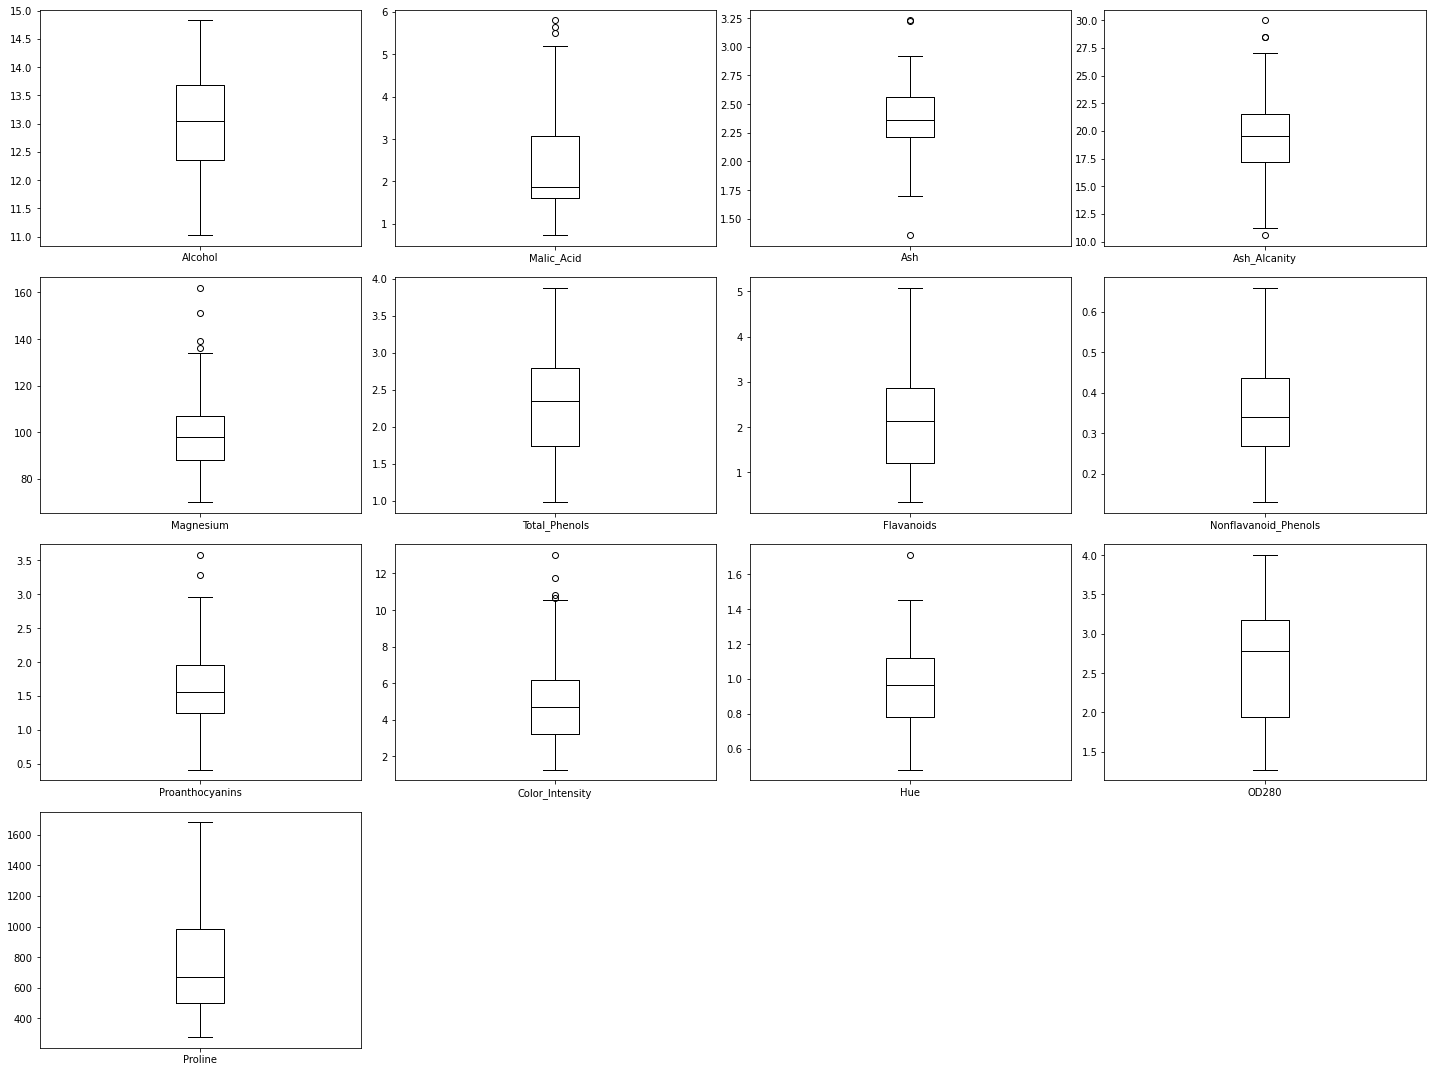

In [11]:
data.plot( kind = 'box',figsize=(20,15),subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.tight_layout()
plt.show()

In [12]:
Q1 = np.percentile(data['Malic_Acid'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Malic_Acid'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Malic_Acid'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR

In [13]:
print(low_lim)
print(up_lim)

-0.585
5.255


In [14]:
ind1 = data['Malic_Acid']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [15]:
ind2 = data['Malic_Acid']>up_lim
data.loc[ind2].index

Int64Index([123, 137, 173], dtype='int64')

In [16]:
data.drop([123, 137, 173], inplace=True)

In [17]:
Q1 = np.percentile(data[ 'Ash_Alcanity'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data[ 'Ash_Alcanity'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data[ 'Ash_Alcanity'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
ind2 = data['Ash_Alcanity']>up_lim
data.loc[ind2].index

Int64Index([73, 121, 127], dtype='int64')

In [18]:
data.drop([73, 121, 127], inplace=True)

In [19]:
Q1 = np.percentile(data['Magnesium'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Magnesium'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Magnesium'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
ind2 = data['Magnesium']>up_lim
data.loc[ind2].index

Int64Index([69, 78, 95], dtype='int64')

In [20]:
data.drop([69, 78, 95], inplace=True)

In [21]:
Q1 = np.percentile(data[ 'Proanthocyanins'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data[ 'Proanthocyanins'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data[ 'Proanthocyanins'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
ind2 = data[ 'Proanthocyanins']>up_lim
data.loc[ind2].index

Int64Index([14, 110], dtype='int64')

In [22]:
data.drop([14, 110], inplace=True)

In [23]:
Q1 = np.percentile(data['Color_Intensity'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Color_Intensity'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Color_Intensity'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
ind2 = data['Color_Intensity']>up_lim
data.loc[ind2].index

Int64Index([151, 158, 159, 166], dtype='int64')

In [24]:
data.drop([151, 158, 159, 166], inplace=True)

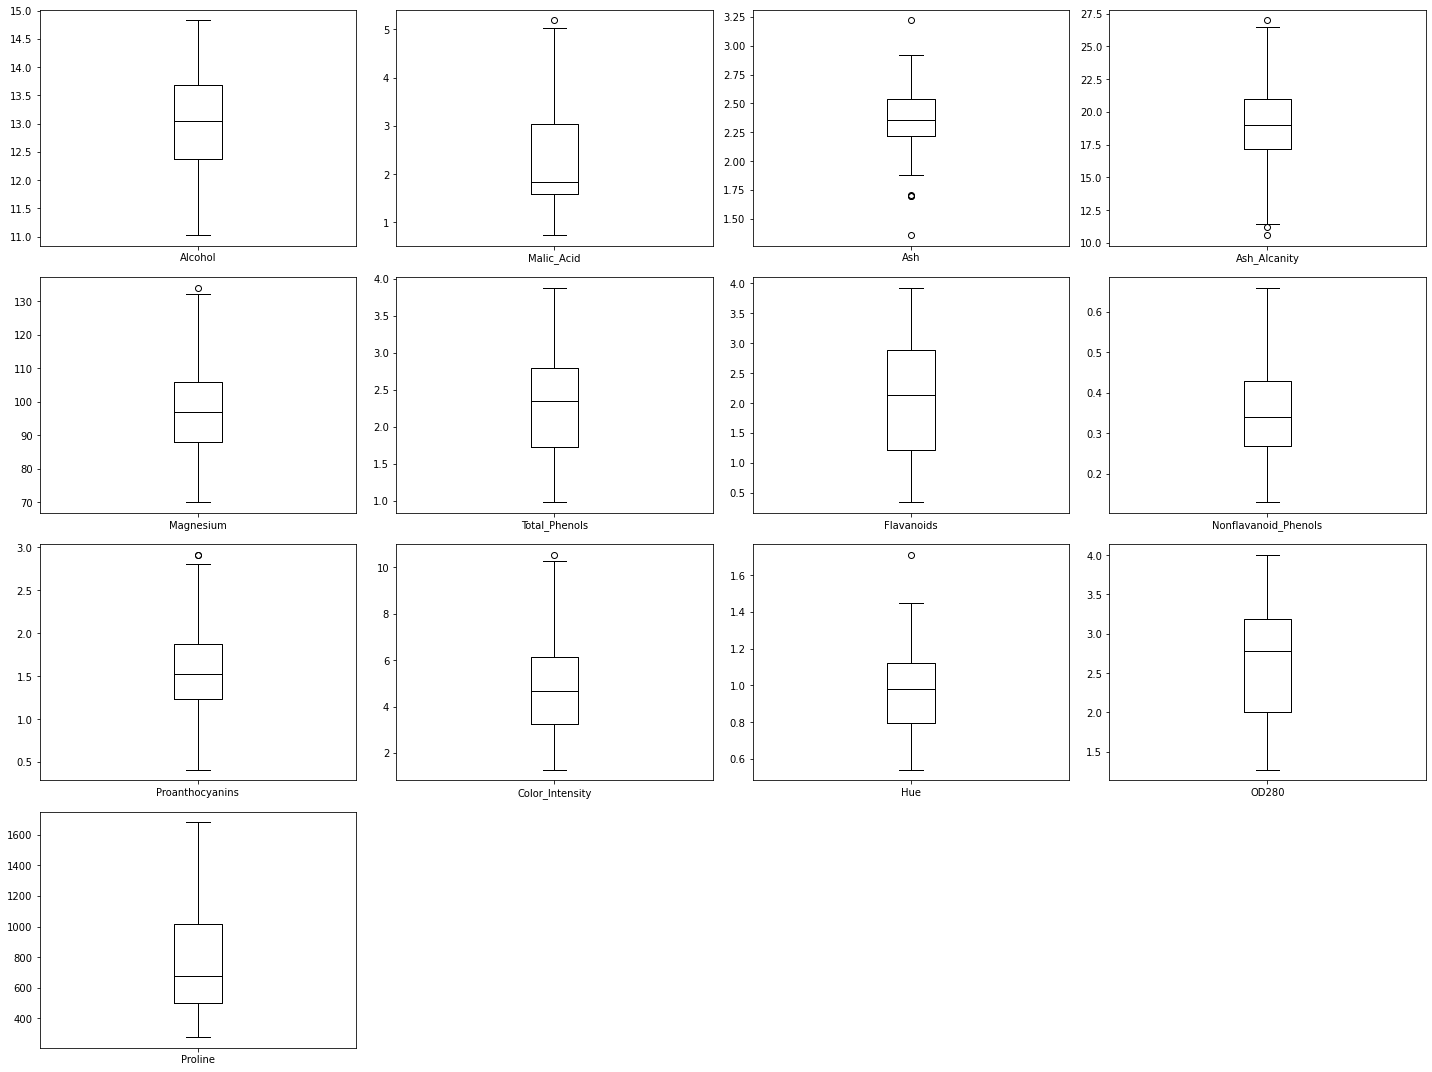

In [43]:
data.plot( kind = 'box',figsize=(20,15),subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.tight_layout()
plt.show()

### Scaling

In [25]:
X=data.iloc[:,1:].values

In [26]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer

In [27]:
standardisation = StandardScaler()
X= standardisation.fit_transform(X)

In [28]:
X

array([[-0.5592172 ,  0.26360387, -1.20498223, ...,  0.34066023,
         1.83098471,  0.99155176],
       [-0.4922637 , -0.84894567, -2.64846519, ...,  0.38539006,
         1.0948738 ,  0.94417168],
       [ 0.06249384,  1.18433451, -0.22078929, ...,  0.29593039,
         0.76928628,  1.37059242],
       ...,
       [ 1.89893261, -0.38858034,  0.23850074, ..., -1.67218234,
        -1.50982636,  0.26505716],
       [ 0.2824839 ,  0.0334212 ,  0.23850074, ..., -1.6274525 ,
        -1.42489049,  0.28085053],
       [ 1.72676648,  1.45288095,  1.71479014, ..., -1.58272267,
        -1.45320245, -0.60357768]])

# KMean Clustering

In [29]:
#principle component analysis is using since we have multidiamensional dataset
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(X)


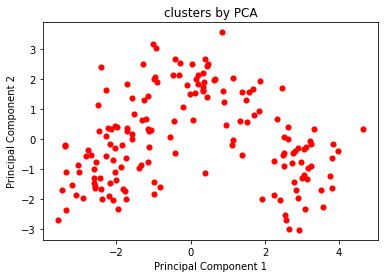

In [30]:
#sns.set(rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('clusters by PCA')
plt.show()

1956.0000000000002
1343.945644980742
1041.5694996097507
960.0498971932029
903.4080527726945
841.9663288687317
794.3689462729793
757.1960289677174
723.5187904786384
691.9618288577778


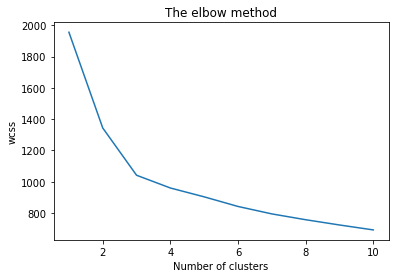

In [31]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### Optimum number of clusters in Kmean clustering is 3

In [32]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
type(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 0 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Clusters with out PCA

Text(0, 0.5, 'Magnesium')

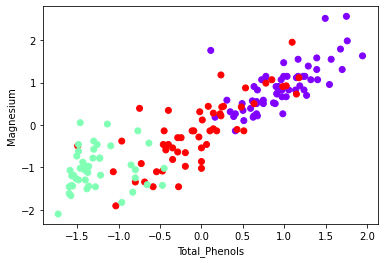

In [33]:
plt.scatter(X[:,5],X[:,4],c=y_kmeans,cmap='rainbow')
plt.xlabel('Total_Phenols')
plt.ylabel('Magnesium')

Text(0, 0.5, 'ASh')

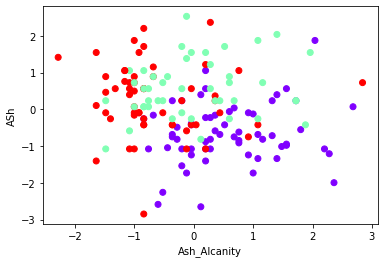

In [34]:
plt.scatter(X[:,3],X[:,2],c=y_kmeans,cmap='rainbow')
plt.xlabel('Ash_Alcanity')
plt.ylabel('ASh')

In [35]:
y_kmean=kmeans.fit_predict(pca_data)

In [36]:
center = kmeans.cluster_centers_
center_pca = pca.transform(center)
pd.Series(y_kmeans).value_counts()

0    62
2    56
1    45
dtype: int64

## Clusters of Wine in terms of PCA

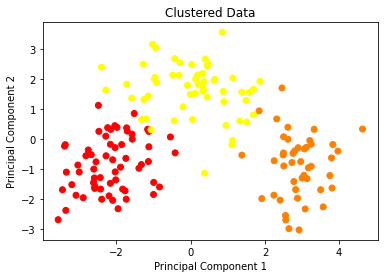

In [37]:

plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=y_kmeans, cmap='autumn')
#plt.scatter(center_pca[:, 0], center_pca[:, 1], s=169)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data')
plt.show()

# Hierarchial Clustering

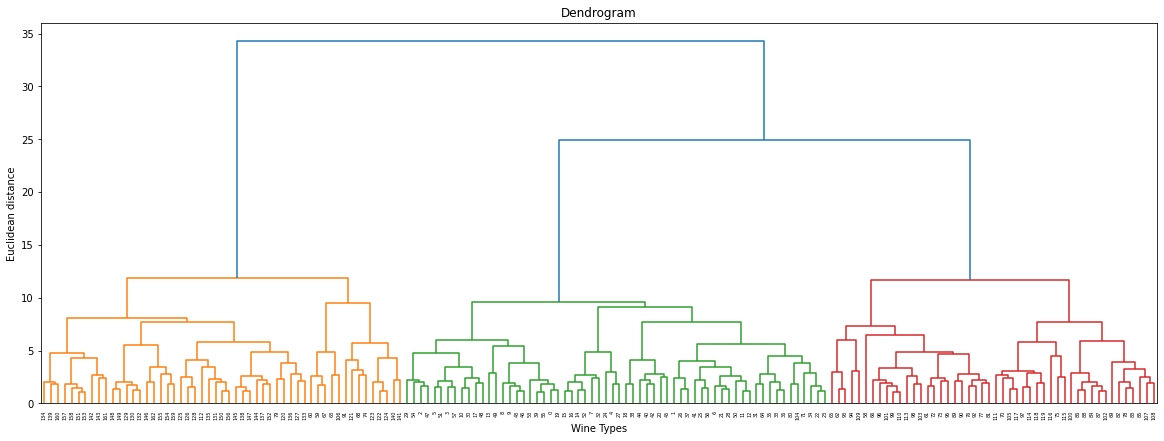

In [38]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Wine Types')
plt.ylabel('Euclidean distance')
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [40]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

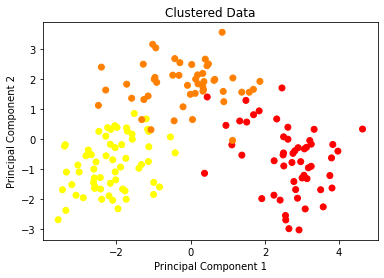

In [41]:
plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=y_hc, cmap='autumn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data')
plt.show()

### optimum number of clusters is 3 for Agglomerative Clustering